# Cross-correlation for magnetic data

**This notebook shows the use of the cross-correlation coefficient techniqe for magnetic data. This technique was used by several research groups$^*$ in order to estimate the magnetization direction and another signals that also depend on this vector, although not very changeable or influential by this vector.**

**The simple cross-correlation coeficient is given by:**
# $$ C = \dfrac{\sum(F - \bar{F})(G - \bar{G})}
{\sqrt{\sum(F - \bar{F})^2 \sum(G - \bar{G})^2}} $$ 
**where $F$ and $G$ represent the two magnetic data, firs derivative and horizontal gradient, for example; and $\bar{F}$ and $\bar{G}$ represent the mean for the two data sets.**

### *Some researches: 
* Fedi, M., Florio, G., & Rapolla, A. (1994). A method to estimate the total magnetization direction from a distortion analysis of magnetic anomalies. Geophysical Prospecting, 42(3), 261-274. Doi: [10.1111/j.1365-2478.1994.tb00209.x/abstract](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.1994.tb00209.x/abstract)

* Dannemiller, N., & Li, Y. (2006). A new method for determination of magnetization direction. Geophysics, 71(6), L69-L73. Doi: [10.1190/1.2356116](http://library.seg.org/Doi/10.1190/1.2356116)

* Gerovska, D., Araúzo‐Bravo, M. J., & Stavrev, P. (2009). Estimating the magnetization direction of sources from southeast Bulgaria through correlation between reduced‐to‐the‐pole and total magnitude anomalies. Geophysical Prospecting, 57(4), 491-505. Doi: [10.1111/j.1365-2478.2008.00761.x](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.2008.00761.x/full)

In [12]:
# Copying all usefull libraries
import numpy
from matplotlib import pyplot as plt
import sys

In [2]:
sys.path.append('codes/') 

In [14]:
from codes import grids, statistical, prism, sphere, auxiliars, filtering, derivative
from codes.plot import draw_prism

In [5]:
# Defines number of points
n = 40
shape = (n, n)
area = [-2000., 2000., -2000., 2000.]
# Define the position vectors
x, y, z = grids.regular_grid(area, shape, level=-150.)

In [6]:
# Define the elements of the prims for gravity and magnetic computation
dikemodel = [-500., 500., -500., 500., 50., 550.]
bounds = dikemodel[:4]
# Directions
incf, decf = 55., 44. # field
incs, decs = 33., 22. # source

In [9]:
# Calculating the total field anomaly
tf = prism.prism_tf(x, y, z, dikemodel, 1.2, incf, decf, incs, decs)

In [10]:
_ = statistical.analysis(tf, 'nT')

Minimum:    -149.3207 nT
Maximum:    265.2526 nT
Mean value: 2.0974 nT
Variation:  414.5733 nT


In [11]:
# Adding noise
tfa = auxiliars.noise_normal_dist(tf, 5., 0.15)

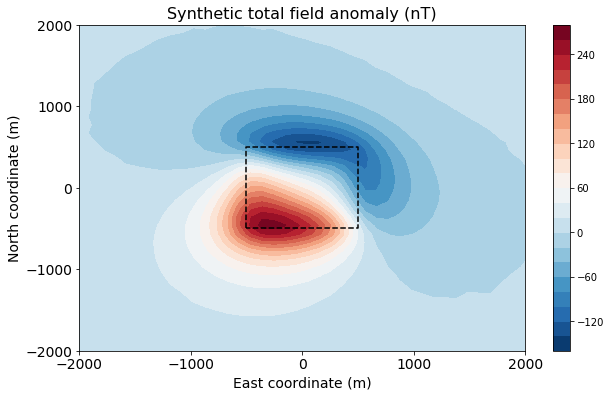

In [16]:
# Plotting the true correlation
plt.figure(figsize=(10,6))
plt.contourf(y.reshape(shape), x.reshape(shape), tfa.reshape(shape), 20, cmap = plt.cm.RdBu_r)
draw_prism(bounds, xy2ne=True)
plt.title('Synthetic total field anomaly (nT)', fontsize = 16)
plt.xlabel('East coordinate (m)', fontsize = 14)
plt.ylabel('North coordinate (m)', fontsize = 14)
plt.xticks(numpy.linspace(x.min(), x.max(), 5), fontsize = 14)
plt.yticks(numpy.linspace(y.min(), y.max(), 5), fontsize = 14)
plt.colorbar()
plt.show()

**Testing for positive inclination values (True direction)**

In [17]:
# Creating the inclination and declination values
inc = numpy.arange(10, 91, 1)
dec = numpy.arange(-180., 181., 1)

# Grid creation
Dec, Inc = numpy.meshgrid(dec, inc)

In [18]:
# Size of the vectors
ni, nd = inc.size, dec.size
coef = numpy.zeros_like(Dec)

In [20]:
xo = x.reshape(shape)
yo = y.reshape(shape)
do = tfa.reshape(shape)

In [22]:
# Calculation
for i in range(ni):
    for j in range(nd):
        rtp = filtering.reduction(xo, yo, do, incf, decf, inc[i], dec[j])
        tga = derivative.totalgrad(xo, yo, rtp)
        vga = derivative.zderiv(xo, yo, rtp)
        coef[i,j] = statistical.cccoef(tga, vga)

In [23]:
# Analysing the positive coefficients
_ = statistical.analysis(coef, 'no unit')

Minimum:    0.0494 no unit
Maximum:    0.6679 no unit
Mean value: 0.4302 no unit
Variation:  0.6185 no unit


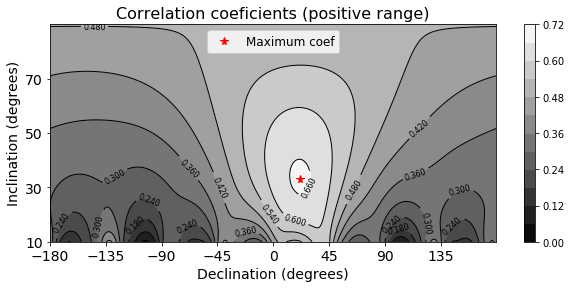

In [25]:
# Plotting the true correlation
plt.figure(figsize=(10,4))
fig1 = plt.contour(Dec, Inc, coef, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, coef, 10, cmap = plt.cm.gray)
plt.plot(decs, incs, 'r*', markersize = 8, label = 'Maximum coef')
plt.clabel(fig1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlation coeficients (positive range)', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(numpy.arange(dec.min(), dec.max(), 45), fontsize = 14)
plt.yticks(numpy.arange(inc.min(), inc.max(), 20), fontsize = 14)
plt.legend(loc = 'upper center', fontsize = 'large')
plt.colorbar()
plt.show()

**Testing for negative inclination values (Wrong direction)**

In [26]:
# Creating the inclination and declination values
inc = numpy.arange(-90,-9, 1)
dec = numpy.arange(-180., 181., 1)

# Grid criation 
Dec, Inc = numpy.meshgrid(dec, inc)

In [27]:
# Size of the vectors
ni, nd = inc.size, dec.size
coef = numpy.zeros_like(Dec)

In [28]:
# Calculation
for i in range(ni):
    for j in range(nd):
        rtp = filtering.reduction(xo, yo, do, incf, decf, inc[i], dec[j])
        tga = derivative.totalgrad(xo, yo, rtp)
        vga = derivative.zderiv(xo, yo, rtp)
        coef[i,j] = statistical.cccoef(tga, vga)

In [ ]:
# Analysing the negative coefficients
_ = statistical.analysis(coef, '(no unit)')

In [ ]:
# Plotting the results
plt.figure(figsize=(10,4))
fig1 = plt.contour(Dec, Inc, coef, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, coef, 10, cmap = plt.cm.gray_r)
#plt.plot(decs, incs, 'r*', markersize = 8, label = 'Maximum coef')
plt.clabel(fig1, colors = 'k', fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlation coeficients (negative range)', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(numpy.arange(dec.min(), dec.max(), 45), fontsize = 14)
plt.yticks(numpy.arange(inc.min(), inc.max(), 20), fontsize = 14)
plt.legend(loc = 'upper center', fontsize = 'large')
plt.colorbar()

plt.savefig('figures/correlation(2).png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()